# 04 – Evaluation & Business Interpretation

> Consolidated from the original project notebook.

# 04 – Evaluation

> Split automatically from `Final_Group_Project-1.ipynb`. Review and adjust as needed.

## **Model Evaluation**

In [785]:
import pandas as pd
import numpy as np
import os
from sklearn import neighbors, linear_model,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score,  confusion_matrix, classification_report, auc,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

####  **Confusion Matrix**


In [788]:
from sklearn.metrics import confusion_matrix           # confusion_matrix will help us compute confusion matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrices(cm, classes, title_passed):
    """
    This function prints and plots both normalized and non-normalized confusion matrices side by side.
    """
    # Create a 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    def plot_confusion_matrix(ax, cm, normalize=False, title=title_passed):
        """
        This function prints and plots a single confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Confusion matrix Normalized for ' + title
        else:
            title = 'Confusion matrix, without normalization for ' + title

        print(title)
        print(cm)

        cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(title)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        # Create and attach colorbar to the axes
        fig.colorbar(cax, ax=ax)

    # Plot non-normalized confusion matrix
    # 
    plot_confusion_matrix(axes[0], cm, normalize=False)

    # Plot normalized confusion matrix
    plot_confusion_matrix(axes[1], cm, normalize=True)

    plt.tight_layout()
    plt.show()

### **Performance Metrics & Classification Report**

Confusion matrix, without normalization for Linear Regression
[[2698 1279]
 [  92  453]]
Confusion matrix Normalized for Linear Regression
[[0.6784 0.3216]
 [0.1688 0.8312]]


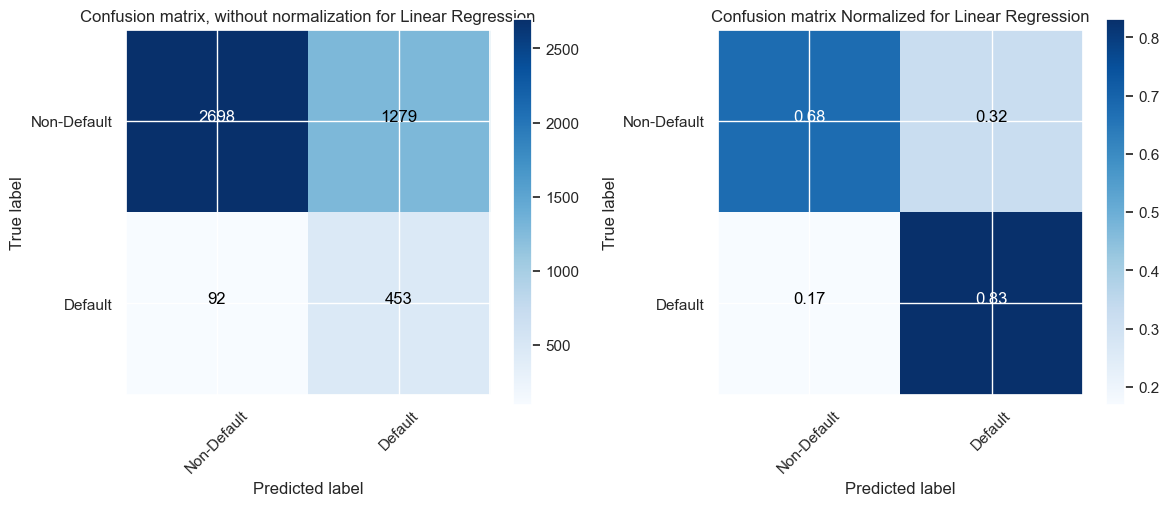

In [791]:
y_pred_lr = clf_lr.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_r = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrices(cnf_matrix_best_model_clf_r, classes=['Non-Default','Default'],title_passed='Linear Regression')

Confusion matrix, without normalization for KNN
[[2447 1530]
 [ 158  387]]
Confusion matrix Normalized for KNN
[[0.6153 0.3847]
 [0.2899 0.7101]]


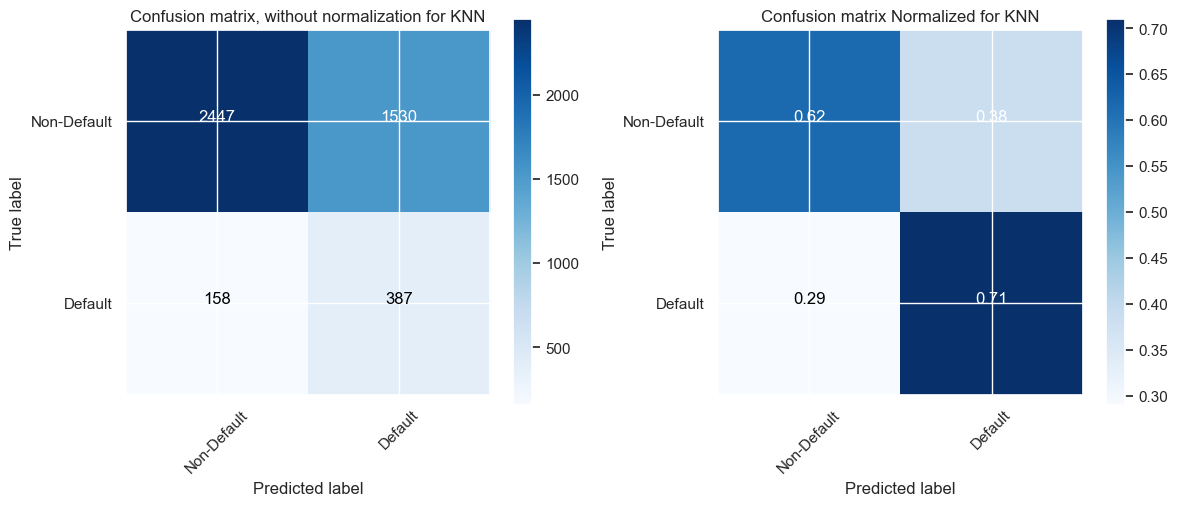

In [769]:
y_pred_knn = clf_knn.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrices(cnf_matrix_best_model_clf_knn, classes=['Non-Default','Default'],title_passed='KNN')

Confusion matrix, without normalization for Decision Tree
[[2483 1494]
 [  91  454]]
Confusion matrix Normalized for Decision Tree
[[0.6243 0.3757]
 [0.167  0.833 ]]


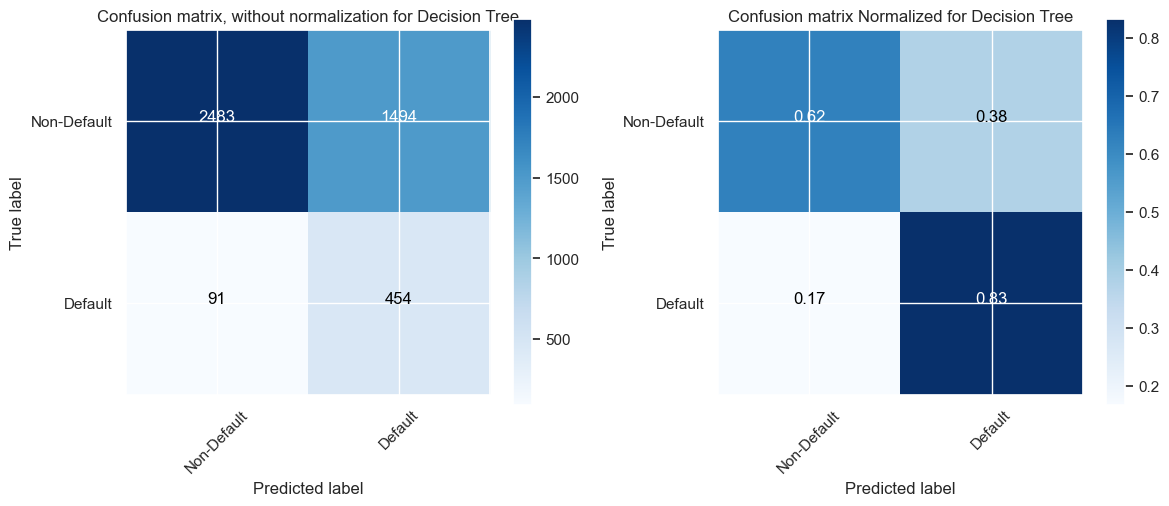

In [793]:
y_pred_dt = clf_dt.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrices(cnf_matrix_best_model_clf_dt, classes=['Non-Default','Default'],title_passed='Decision Tree')

#### **ROC Curves**

In [779]:
# Function for ROC curves
def plot_ROC_curve(clf, label, clr, ls, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    return plt

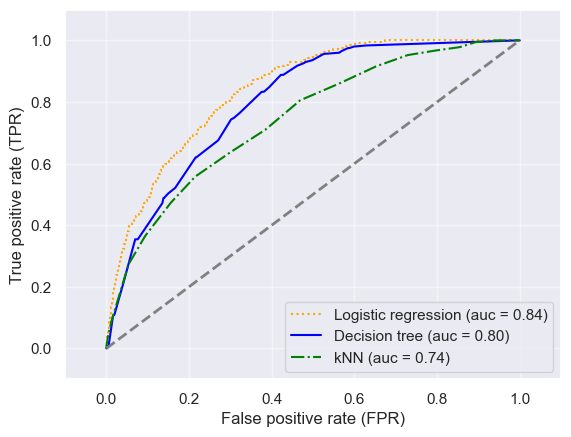

In [780]:
plot_ROC_curve(clf_lr, label='Logistic regression', clr='orange', ls=':', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)
#DT
plot_ROC_curve(clf_dt, label='Decision tree', clr='blue', ls='-', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)
#kNN
plot_ROC_curve(clf_knn, label='kNN', clr='green', ls='-.', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Business Interpretation

Key takeaways and recommendations based on model results.

# 05 – Business Case

> Split automatically from `Final_Group_Project-1.ipynb`. Review and adjust as needed.

### **Understanding each feature**

The dataset has 142 columns so it important to understand the description of each feature before we explore them. After analysing, the features below were excluded as they have a potential of causing a data leakage and also being irrevant such as unique values.

#### **Features Causing Data Leakage**

The following features have been excluded due to their potential to cause data leakage in the prediction of loan defaults:

| Feature Name                   | Reason for Removal                                                                                                          | Type of Issue |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------|---------------|
| `total_pymnt`                  | Derived from loan status (payment status)                                                                                   | Data Leakage  |
| `total_rec_int`                | Derived from loan status (interest earned)                                                                                  | Data Leakage  |
| `total_rec_prncp`              | Derived from loan status (principal repaid)                                                                                 | Data Leakage  |
| `last_pymnt_d`                 | Derived from loan status (last payment date)                                                                                | Data Leakage  |
| `last_pymnt_amnt`              | Derived from loan status (last payment amount)                                                                              | Data Leakage  |
| `hardship_last_payment_amount` | Related to loan status (hardship situation)                                                                                 | Data Leakage  |
| `hardship_loan_status`         | Directly relates to loan status                                                                                             | Data Leakage  |
| `hardship_status`              | Reflects the status of hardship related to loan                                                                             | Data Leakage  |
| `debt_settlement_flag`         | May indicate poor loan performance                                                                                          | Data Leakage  |
| `debt_settlement_flag_date`    | Related to debt management status                                                                                           | Data Leakage  |
| `settlement_status`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_date`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_amount`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_percentage`        | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_term`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_amount`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_start_date`          | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_end_date`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_length`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_type`                | Related to loan repayment status                                                                                            | Data Leakage  |
| `num_accts_ever_120_pd`        | Indicates severe delinquency, impacts target                                                                                | Data Leakage  |
| `num_tl_120dpd_2m`             | Indicates severe delinquency, impacts target                                                                                | Data Leakage  |
| `chargeoff_within_12_mths`     | Directly relates to poor loan performance                                                                                   | Data Leakage  |
| `hardship_reason`              | Reflects situation potentially impacting loan status                                                                        | Data Leakage  |
| `delinq_amnt`                  | Reflects amount of delinquency                                                                                              | Data Leakage  |
| `mths_since_last_delinq`       | Indicates recency of delinquency                                                                                            | Data Leakage  |
| `collections_12_mths_ex_med`   | Reflects recent collections, impacts target                                                                                 | Data Leakage  |
| `num_tl_op_past_12m`           | Reflects number of open accounts, impacts target                                                                            | Data Leakage  |
| `pub_rec_bankruptcies`         | Indicates financial trouble                                                                                                 | Data Leakage  |
| `tax_liens`                    | Reflects financial obligations                                                                                              | Data Leakage  |
| `fico_range_low`               | Indicates credit score range                                                                                                | Data Leakage  |
| `fico_range_high`              | Indicates credit score range                                                                                                | Data Leakage  |
| `next_pymnt_d`                 | Reflects future payment intentions                                                                                          | Data Leakage  |
| `last_credit_pull_d`           | Reflects recent credit inquiries                                                                                            | Data Leakage  |
| `collections_12_mths_ex_med`   | Indicates recent collections without medical debts                                                                          | Data Leakage  |
| `mths_since_last_major_derog`  | Reflects recent derogatory events                                                                                           | Data Leakage  |
| `out_prncp`                    | Reflects outstanding principal, may indicate status                                                                         | Data Leakage  |
| `out_prncp_inv`                | Reflects outstanding investment, may indicate status                                                                        | Data Leakage  |
| `total_pymnt_inv`              | Reflects payments that indicate loan performance                                                                            | Data Leakage  |
| `total_rec_late_fee`           | Indicates if late fees were incurred                                                                                        | Data Leakage  |
| `recoveries`                   | Amount recovered post-default                                                                                               | Data Leakage  |
| `collection_recovery_fee`      | Fees incurred during collection efforts post-default                                                                        | Data Leakage  |
| `last_fico_range_high`         | Credit score at last pull, indicating risk                                                                                  | Data Leakage  |
| `last_fico_range_low`          | Credit score at last pull, indicating risk                                                                                  | Data Leakage  |
| `disbursement_method`          | Information about the disbursement method is only known after the loan is approved, leading to potential data leakage.      | Data Leakage  | 
| `issue_d`                      | The loan issue date is known after approval, introducing data leakage as it's not available at the time of application.     | Data Leakage  | 
| `pymnt_plan`                   | Indicates if the borrower is on a payment plan, often known after the loan starts showing trouble, which can cause leakage. | Data Leakage  | 
| `funded_amnt`                  | Represents the actual amount funded, set after loan approval, which can cause leakage.                                      | Data Leakage  |   
| `funded_amnt_inv`              | The investor's funded amount, known only after the loan is approved, potentially causing data leakage.                      | Data Leakage  |   
| `hardship_flag`                | Indicates if a borrower has received hardship assistance, often after loan distress, which can cause leakage.               | Data Leakage  |   

---


### **Irrelevant Features**

The following features have been excluded due to their irrelevance in predicting loan defaults, often being unique identifiers or unrelated to loan performance:

| Feature Name                | Reason for Removal                                        | Type of Issue |
|-----------------------------|-----------------------------------------------------------|---------------|
| `id`                        | Unique identifier, no predictive value (100% null values) | Irrelevance   |
| `member_id`                 | Unique identifier, no predictive value (100% null values) | Irrelevance   |
| `url`                       | Unrelated to prediction task                              | Irrelevance   |
| `desc`                      | Unrelated to prediction task                              | Irrelevance   |
| `title`                     | Unrelated to prediction task                              | Irrelevance   |
| `zip_code`                  | Too granular and unlikely to add value                    | Irrelevance   |
| `addr_state`                | May cause noise in predictions                            | Irrelevance   |
| `application_type`          | Could correlate with performance                          | Irrelevance   |
| `verification_status_joint` | Reflects financial behavior                               | Irrelevance   |
| `annual_inc_joint`          | May relate to financial stability                         | Irrelevance   |
| `dti_joint`                 | May reflect financial health                              | Irrelevance   |
| `sec_app_fico_range_low`    | Indicates credit risk                                     | Irrelevance   |
| `sec_app_fico_range_high`   | Indicates credit risk                                     | Irrelevance   |
| `tot_coll_amt`              | Indicates financial behavior                              | Irrelevance   |
| `tot_cur_bal`               | Indicates financial behavior                              | Irrelevance   |
| `initial_list_status`       | Reflects initial loan status                              | Irrelevance   |
| `policy_code`               | Indicates policy changes                                  | Irrelevance   |
| `emp_title`                 |                                                           | Irrelevance   |

#### **Summary**
| Feature Category | Count  | 
|------------------|--------|
| Data Leakage     | 50     |
| Irrelevant       | 18     |
| **Total**        | **68** | 


